In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio

In [48]:
def next_power_of_two(n):
    return int(2 ** np.ceil(np.log2(n)))

In [49]:
def fft(signal):
    N = len(signal)
    padded_length = next_power_of_two(N)
    padded_signal = np.concatenate((signal, np.zeros(padded_length - N)))

    if padded_length <= 1:
        return padded_signal

    even_indices = np.arange(0, padded_length, 2)
    odd_indices = np.arange(1, padded_length, 2)
    even = padded_signal[even_indices]
    odd = padded_signal[odd_indices]

    even_fft = fft(even)
    odd_fft = fft(odd)

    exponent = np.exp(-2j * np.pi * np.arange(padded_length) / padded_length)
    half_fft = exponent[:padded_length // 2] * odd_fft

    result = np.zeros(padded_length, dtype=np.complex128)
    result[:padded_length // 2] = even_fft + half_fft
    result[padded_length // 2:] = even_fft - half_fft

    return result

In [50]:
sample_rate, signal = wavfile.read('C:/Users/Dell/Desktop/Multimedia Project/Ananya.wav')
print(signal.shape)
print(signal)
x = np.array(signal)
if(x.ndim == 2):
    signal = signal[:, 0]
print(signal.shape)
print(signal)


(1894936, 2)
[[  0   0]
 [  0   0]
 [  0   0]
 ...
 [-11 -11]
 [-10 -10]
 [ -9  -9]]
(1894936,)
[  0   0   0 ... -11 -10  -9]


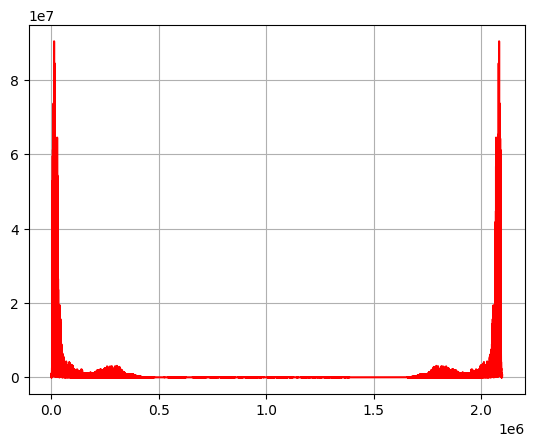

In [51]:
spectrum = np.abs(fft(signal))
plt.plot(spectrum, color = 'Red')
plt.grid()

In [52]:
start_frequency = 0  # Hz
end_frequency = 155  # Hz

# Compute the frequency axis based on the length of the spectrum
num_samples = len(spectrum)
freq_axis = np.linspace(0, sample_rate / 2, num_samples // 2 + 1)

# Find the indices of the frequencies within the target range
start_index = np.where(freq_axis >= start_frequency)[0][0]
end_index = np.where(freq_axis <= end_frequency)[0][-1]

# Extract the corresponding samples from the newspectrum
samples_0_to_155 = spectrum[start_index:end_index+1]

In [53]:
print(samples_0_to_155)

[  459206.           440221.39306666   616600.37812246 ...
  4180686.02823572 19598299.12859925 19239675.35099314]


In [54]:
peak = 0
for i in samples_0_to_155:
    if(i > peak):
        peak = i

maxi = 4 * 1e7
if(peak >= maxi):
    print("It is a male voice")
else:
    print("It is a female voice")

It is a female voice


Frequncy Spectrum Full For Reference

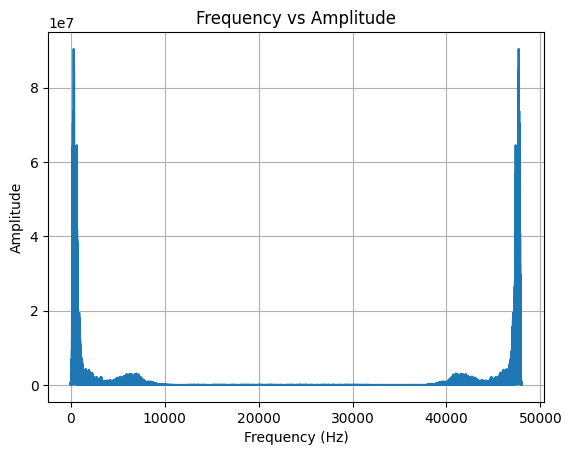

In [55]:
num_samples = len(spectrum)
frequency_resolution = sample_rate / num_samples
freqaxis = np.arange(num_samples) * frequency_resolution
plt.plot(freqaxis, spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency vs Amplitude')
plt.grid(True)
plt.show()
